### Predict whether income exceeds $50K/yr based on census data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Machine Learning Modules from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, make_pipeline

In [3]:
import pandas as pd
Adult_dataset = pd.read_csv(r'C:\Users\ADMIN\Dropbox\PC\Downloads\adult.csv', header = None, names = ['Age','Workclass','Fnlwgt',
 'Education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss',
 'hours-per-week','native-country','income'])                                                                                      

In [4]:
Adult_dataset.head()

,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
Adult_dataset.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [6]:
Adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
Adult_dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
Adult_dataset.nunique()

Age                  73
Workclass             9
Fnlwgt            21648
Education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [9]:
# check for potential duplicates
print('number of duplicates:',Adult_dataset.duplicated().sum())

number of duplicates: 24


In [10]:
# Remove duplicates
Adult_dataset.drop_duplicates(subset=None,keep='first',inplace=True)

In [11]:
Adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Fnlwgt          32537 non-null  int64 
 3   Education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [12]:
Adult_dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Feature Engineering

In [13]:
# create age band 
Adult_dataset.Age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [14]:

# Define age bands
age_bins = [17, 28, 37, 48, 90, float('inf')]
age_labels = ['0-17', '18-37', '38-48', '49-89', '90+']

# Create a new column 'AgeBand' in the DataFrame
Adult_dataset['AgeBand'] = pd.cut(Adult_dataset['Age'], bins=age_bins, labels=age_labels, right=False)


In [15]:
Adult_dataset.head()

,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,AgeBand
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,38-48
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,49-89
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,38-48
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,49-89
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-37


In [16]:
Adult_dataset.AgeBand.value_counts()

38-48    8550
49-89    8137
0-17     8019
18-37    7789
90+        42
Name: AgeBand, dtype: int64

#### Data Exploration

In [17]:
#from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Adult_dataset['income_level'] = label_encoder.fit_transform(Adult_dataset['income'])

In [18]:
Adult_dataset.tail()

,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,AgeBand,income_level
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0-17,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,38-48,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,49-89,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0-17,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,49-89,1


In [19]:
Adult_dataset.income_level.value_counts()

0    24698
1     7839
Name: income_level, dtype: int64

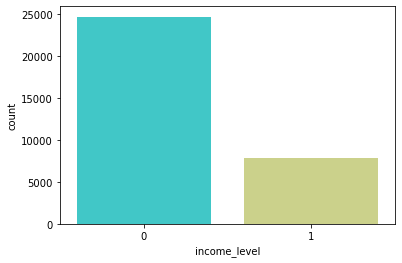

<Figure size 432x288 with 0 Axes>

In [20]:
sns.countplot(x='income_level',data=Adult_dataset,palette='rainbow')
plt.show()
plt.savefig('count_plot')

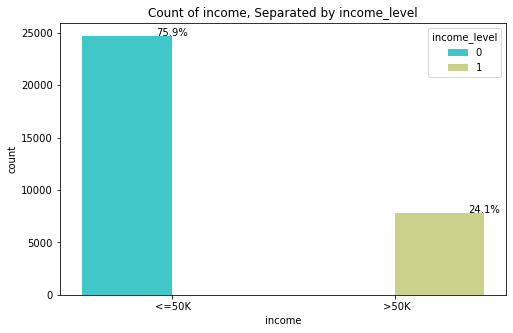

In [21]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='income',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of income, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

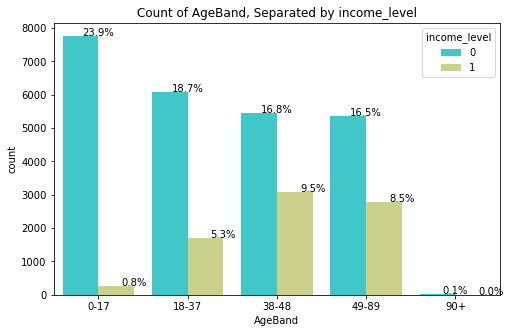

In [22]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='AgeBand',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of AgeBand, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

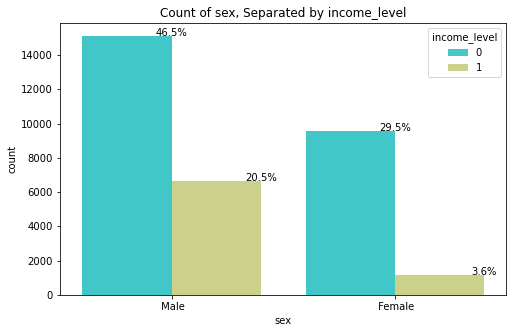

In [23]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='sex',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of sex, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

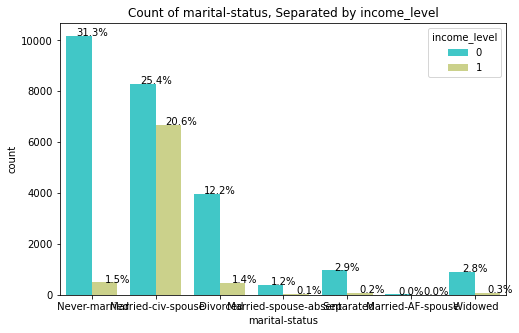

In [24]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='marital-status',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of marital-status, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

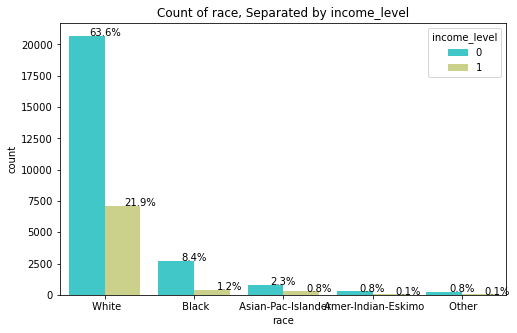

In [25]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='race',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of race, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

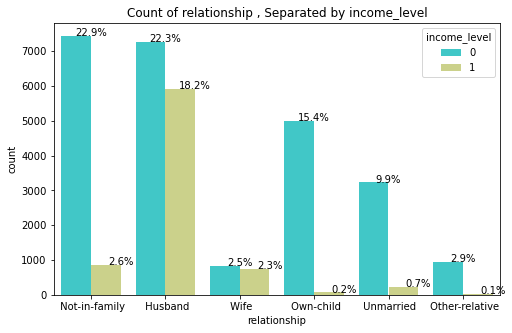

In [26]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='relationship',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of relationship , Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

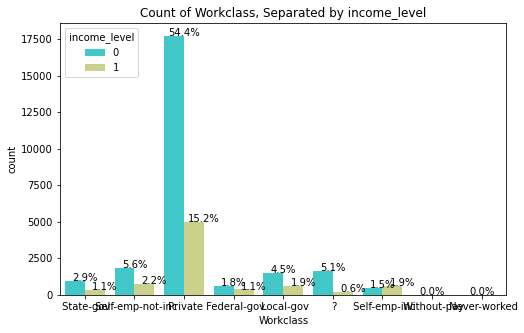

In [27]:
plt.figure(figsize=(8,5))
total = float(len(Adult_dataset))
ax = sns.countplot(x='Workclass',data=Adult_dataset, palette='rainbow',hue='income_level')
plt.grid(False)
plt.title("Count of Workclass, Separated by income_level")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### Data TRansormation

In [28]:
label_encoder = LabelEncoder()
Adult_dataset['gender'] = label_encoder.fit_transform(Adult_dataset['sex'])

In [29]:
Adult_dataset.head()

,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,AgeBand,income_level,gender
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,38-48,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,49-89,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,38-48,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,49-89,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-37,0,0


In [30]:
cat_cols = ['Workclass','Education','marital-status','occupation','relationship','race','native-country','AgeBand']

In [31]:
#encode the categorical columns

Adult_dataset = pd.get_dummies(data = Adult_dataset, columns = cat_cols)

Adult_dataset.head()

,Age,Fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,income_level,gender,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,AgeBand_0-17,AgeBand_18-37,AgeBand_38-48,AgeBand_49-89,AgeBand_90+
0,39,77516,13,Male,2174,0,40,<=50K,0,1,...,0,0,1,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,<=50K,0,1,...,0,0,1,0,0,0,0,0,1,0
2,38,215646,9,Male,0,0,40,<=50K,0,1,...,0,0,1,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,<=50K,0,1,...,0,0,1,0,0,0,0,0,1,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
column_names = Adult_dataset.columns.tolist()

print("Columns in the DataFrame:")
for column in column_names:
    print(column)

Columns in the DataFrame:
Age
Fnlwgt
education-num
sex
capital-gain
capital-loss
hours-per-week
income
income_level
gender
Workclass_ ?
Workclass_ Federal-gov
Workclass_ Local-gov
Workclass_ Never-worked
Workclass_ Private
Workclass_ Self-emp-inc
Workclass_ Self-emp-not-inc
Workclass_ State-gov
Workclass_ Without-pay
Education_ 10th
Education_ 11th
Education_ 12th
Education_ 1st-4th
Education_ 5th-6th
Education_ 7th-8th
Education_ 9th
Education_ Assoc-acdm
Education_ Assoc-voc
Education_ Bachelors
Education_ Doctorate
Education_ HS-grad
Education_ Masters
Education_ Preschool
Education_ Prof-school
Education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ ?
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ H

In [33]:
cols = ['sex','income','Fnlwgt']
Adult_statu = Adult_dataset.drop(cols,axis=1,inplace=True)


In [34]:
Adult_dataset.head()

,Age,education-num,capital-gain,capital-loss,hours-per-week,income_level,gender,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,AgeBand_0-17,AgeBand_18-37,AgeBand_38-48,AgeBand_49-89,AgeBand_90+
0,39,13,2174,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,50,13,0,0,13,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection

#### WOE

In [35]:
# Split the dataset into Independent and Dependent Variables
X = Adult_dataset.loc[:,Adult_dataset.columns != 'income_level']
y = Adult_dataset['income_level']

In [36]:
pip install xverse 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.24.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:


In [37]:
# import the voting selector
from xverse.ensemble import VotingSelector

In [38]:
clf = VotingSelector(minimum_votes=2)
clf.fit(X, y)

VotingSelector(minimum_votes=2, no_of_features=55,
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [39]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,marital-status_ Married-civ-spouse,1.267590e+00,0.066057,0.628657,6.717053e-02,3472.595296,0.529948
1,relationship_ Husband,9.196174e-01,0.047624,0.000000,5.027107e-02,3110.590942,0.000000
2,marital-status_ Never-married,8.210841e-01,0.025561,-1.183723,2.790986e-02,2215.543502,-0.106201
3,AgeBand_0-17,7.314559e-01,0.018540,-1.692090,2.218086e-02,1910.797210,-0.561369
4,relationship_ Own-child,6.553072e-01,0.009373,-1.044434,1.212335e-02,1435.600189,-0.063712
...,...,...,...,...,...,...,...
106,native-country_ Scotland,8.970064e-07,0.000084,0.000000,1.005740e-04,0.005403,0.000000
107,Workclass_ Without-pay,3.214072e-07,0.000057,-0.225395,8.895168e-05,4.443518,0.000000
108,native-country_ Outlying-US(Guam-USVI-etc),3.214072e-07,0.000035,0.000000,3.836564e-05,4.443518,0.000000
109,Workclass_ Never-worked,8.034041e-08,0.000002,0.000000,3.234927e-06,2.221759,0.000000


In [40]:
# votes 
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,marital-status_ Married-civ-spouse,1,1,1,1,1,1,6
13,relationship_ Unmarried,1,1,1,1,1,1,6
29,race_ Black,1,1,1,1,1,1,6
28,occupation_ Handlers-cleaners,1,1,1,1,1,1,6
26,relationship_ Wife,1,1,1,1,1,1,6
...,...,...,...,...,...,...,...,...
82,native-country_ England,0,0,0,0,0,0,0
86,native-country_ Honduras,0,0,0,0,0,0,0
87,native-country_ Trinadad&Tobago,0,0,0,0,0,0,0
88,native-country_ Laos,0,0,0,0,0,0,0


In [41]:
# transform your data into important features 

X = clf.transform(X)

In [42]:
X

,marital-status_ Married-civ-spouse,relationship_ Unmarried,race_ Black,occupation_ Handlers-cleaners,relationship_ Wife,native-country_ Mexico,Education_ Doctorate,occupation_ Machine-op-inspct,Workclass_ Private,Education_ Prof-school,...,Education_ 9th,race_ Amer-Indian-Eskimo,marital-status_ Married-spouse-absent,Education_ 5th-6th,native-country_ Dominican-Republic,Education_ Assoc-voc,Education_ 1st-4th,native-country_ ?,occupation_ Craft-repair,Education_ 12th
0,-1.511875,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,0.260798,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
1,0.934382,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,0.260798,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
2,-1.511875,0.111815,0.066734,-1.554998,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
3,0.934382,0.111815,-0.807851,-1.554998,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
4,0.934382,0.111815,-0.807851,0.042314,1.048039,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.934382,0.111815,0.066734,0.042314,1.048039,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
32557,0.934382,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,-0.802878,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
32558,-1.511875,-1.547202,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211
32559,-1.511875,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.016465,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211


In [43]:
final_dataset =  pd.concat([X, Adult_dataset.income_level], axis=1)

In [44]:
final_dataset

,marital-status_ Married-civ-spouse,relationship_ Unmarried,race_ Black,occupation_ Handlers-cleaners,relationship_ Wife,native-country_ Mexico,Education_ Doctorate,occupation_ Machine-op-inspct,Workclass_ Private,Education_ Prof-school,...,race_ Amer-Indian-Eskimo,marital-status_ Married-spouse-absent,Education_ 5th-6th,native-country_ Dominican-Republic,Education_ Assoc-voc,Education_ 1st-4th,native-country_ ?,occupation_ Craft-repair,Education_ 12th,income_level
0,-1.511875,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,0.260798,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
1,0.934382,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,0.260798,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
2,-1.511875,0.111815,0.066734,-1.554998,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
3,0.934382,0.111815,-0.807851,-1.554998,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
4,0.934382,0.111815,-0.807851,0.042314,1.048039,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.934382,0.111815,0.066734,0.042314,1.048039,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
32557,0.934382,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,-0.802878,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,1
32558,-1.511875,-1.547202,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0
32559,-1.511875,0.111815,0.066734,0.042314,-0.065972,0.020624,-0.035476,0.041255,-0.125024,-0.049257,...,0.006594,0.011323,0.010834,0.002502,-0.004928,0.005734,-0.00099,0.010994,0.01211,0


In [45]:
# Final check for correlation between variables
corr = final_dataset.corr()
corr

,marital-status_ Married-civ-spouse,relationship_ Unmarried,race_ Black,occupation_ Handlers-cleaners,relationship_ Wife,native-country_ Mexico,Education_ Doctorate,occupation_ Machine-op-inspct,Workclass_ Private,Education_ Prof-school,...,race_ Amer-Indian-Eskimo,marital-status_ Married-spouse-absent,Education_ 5th-6th,native-country_ Dominican-Republic,Education_ Assoc-voc,Education_ 1st-4th,native-country_ ?,occupation_ Craft-repair,Education_ 12th,income_level
marital-status_ Married-civ-spouse,1.000000,0.317665,0.125498,0.050025,0.240296,-0.007556,0.052871,-0.017925,0.094540,0.068735,...,0.017168,0.105310,-0.011812,0.014915,0.016253,-0.004003,0.007549,-0.125762,0.037250,0.444609
relationship_ Unmarried,0.317665,1.000000,0.148700,-0.022862,0.077431,0.011765,0.019388,0.007170,0.016603,0.028017,...,0.025739,0.076054,0.009788,0.009892,-0.018661,0.001997,-0.000285,-0.056162,-0.006839,0.142948
race_ Black,0.125498,0.148700,1.000000,0.024763,-0.001241,-0.043102,0.026686,0.035667,-0.000347,0.031866,...,-0.032004,0.020286,-0.011273,0.011899,0.010662,0.000105,-0.030828,-0.046828,0.025911,0.089107
occupation_ Handlers-cleaners,0.050025,-0.022862,0.024763,1.000000,0.035721,0.046464,0.023763,-0.053635,0.105927,0.028135,...,0.014026,0.007358,0.038130,0.006789,0.022885,0.019372,0.005183,-0.079512,0.026427,0.087286
relationship_ Wife,0.240296,0.077431,-0.001241,0.035721,1.000000,0.008061,0.000124,0.007398,0.029237,-0.001913,...,-0.005918,0.025669,0.002855,-0.008135,0.011670,0.008056,0.006445,0.074551,0.003590,0.123230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Education_ 1st-4th,-0.004003,0.001997,0.000105,0.019372,0.008056,0.188837,0.008120,0.022983,0.017199,0.009613,...,0.010700,0.037799,-0.007271,0.052538,0.015082,1.000000,-0.006609,0.002748,-0.008316,0.034291
native-country_ ?,0.007549,-0.000285,-0.030828,0.005183,0.006445,0.019101,0.032339,-0.000218,-0.001736,0.011776,...,0.013258,-0.027845,-0.020908,0.006266,-0.010027,-0.006609,1.000000,0.002958,-0.016704,0.003135
occupation_ Craft-repair,-0.125762,-0.056162,-0.046828,-0.079512,0.074551,0.012420,0.041362,-0.097093,0.068177,0.046012,...,0.004637,-0.000490,0.001130,-0.005616,-0.035892,0.002748,0.002958,1.000000,0.002845,0.012428
Education_ 12th,0.037250,-0.006839,0.025911,0.026427,0.003590,0.014490,0.013168,0.009362,0.018247,0.015591,...,0.002374,0.005805,-0.011792,0.023551,0.024460,-0.008316,-0.016704,0.002845,1.000000,0.044731


### Model Selection

In [46]:
# sklearn modules for Model Selection:
from sklearn.metrics import f1_score,fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from pandas import DataFrame

In [47]:
# Split the dataset into Independent and Dependent Variables
X = final_dataset.loc[:,final_dataset.columns != 'income_level']
y = final_dataset['income_level']

In [48]:
# split the dataset into train and test set and scle them 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
# check the split / partitioning
X_train.shape

(26029, 67)

### Logistic Regression

In [50]:
# Fitting Logistic Regression to the Training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Predicting the Test set results
y_pred = logreg.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.814382    0.65204  0.528384  0.583735  0.549215


### Naive Byes

In [51]:
# Fitting Naive Byes to the Training set:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
1           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


### Decision Trees

In [52]:
# Fitting Decision Tree to the Training set:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = tree.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
2        Decision Tree  0.819299   0.635728  0.623830  0.629723  0.626174
1           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


### Extra Trees

In [53]:
# Fitting Extra Trees to the Training set:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = etc.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Extra Trees', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3          Extra Trees  0.829748   0.675159  0.595134  0.632626  0.609585
0  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
1        Decision Tree  0.819299   0.635728  0.623830  0.629723  0.626174
2           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


### Neural Network

In [54]:
# Fitting Neural Network to the Training set:
mlp =  MLPClassifier()
mlp.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = mlp.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Neural Network', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
4       Neural Network  0.853411   0.721200  0.660012  0.689251  0.671405
0          Extra Trees  0.829748   0.675159  0.595134  0.632626  0.609585
1  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
2        Decision Tree  0.819299   0.635728  0.623830  0.629723  0.626174
3           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


### Gradient Boosting

In [55]:
# Fitting Gradient Boosting  to the Training set:
gb =  GradientBoostingClassifier()
gb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Gradient Boosting', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
5    Gradient Boosting  0.867394   0.798869  0.616968  0.696234  0.646405
0       Neural Network  0.853411   0.721200  0.660012  0.689251  0.671405
1          Extra Trees  0.829748   0.675159  0.595134  0.632626  0.609585
2  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
3        Decision Tree  0.819299   0.635728  0.623830  0.629723  0.626174
4           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


### Random Forest

In [56]:
 #Fitting Random Forest to the Training set:
    
rf = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = rf.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0    Gradient Boosting  0.867394   0.798869  0.616968  0.696234  0.646405
1       Neural Network  0.853411   0.721200  0.660012  0.689251  0.671405
6        Random Forest  0.844806   0.711937  0.621335  0.663558  0.637562
2          Extra Trees  0.829748   0.675159  0.595134  0.632626  0.609585
3  Logistic Regression  0.814382   0.652040  0.528384  0.583735  0.549215
4        Decision Tree  0.819299   0.635728  0.623830  0.629723  0.626174
5           Naive Byes  0.784266   0.538137  0.875858  0.666667  0.778184


#### Gradient boosting is theh best model with the highest accuracy, precision, and fi-score  

### Hyperparameter Tunning

In [57]:
# define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator= gb,
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 110, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 5}


### Model Evaluation & Performance 

#### Cross Validation 

In [58]:
# Validating using k-Fold Cross Validation
accuracies = cross_val_score(estimator = gb,
 X = X_train, y = y_train, cv = 10)
print("Gradient Boosting Classifier Accuracy:%0.2f (+/- %0.2f)"  % (accuracies.mean(),accuracies.std() * 2))

Gradient Boosting Classifier Accuracy:0.87 (+/- 0.01)


#### Confusion Matrix 

In [62]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[4616,  289],
       [ 554, 1049]], dtype=int64)

<AxesSubplot:>

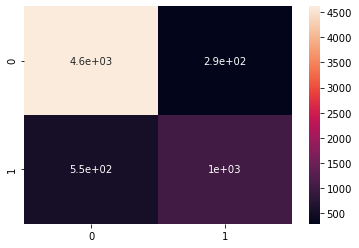

In [63]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

#### Classification Report

In [65]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4905
           1       0.78      0.65      0.71      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508



In [66]:
# print the accuracy of the model
random_search_predictions = random_search.predict(X_test)
accuracy_score(y_test, random_search_predictions)

0.8704671173939766

### Save Model for deployment

In [67]:
# install the library
pip install joblib

In [69]:
# import the library 
import joblib
filename = 'Adult_income_prediction'
model_name = random_search 
joblib.dump(model_name, filename)

['Adult_income_prediction']